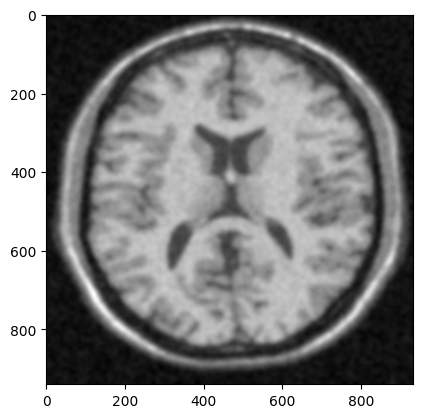

In [5]:
#Gaussian
from skimage import img_as_float
from skimage.metrics import peak_signal_noise_ratio
from matplotlib import pyplot as plt
from skimage import io
from scipy import ndimage as nd

PATH = "/Users/simoneboesso/Desktop/nuclei-segmentation/image-processing/images"
noisy_img = img_as_float(io.imread(PATH + "/MRI_noisy.tif"))
#Need to convert to float as we will be doing math on the array
#Also, most skimage functions need float numbers
ref_img = img_as_float(io.imread(PATH +"/MRI_clean.tif"))
                    
gaussian_img = nd.gaussian_filter(noisy_img, sigma=5)
plt.imshow(gaussian_img, cmap='gray')
##
## The image has less noise but is blurred!
##

PSNR of input noisy image =  17.03789982624248
PSNR of cleaned image =  16.225197089561874


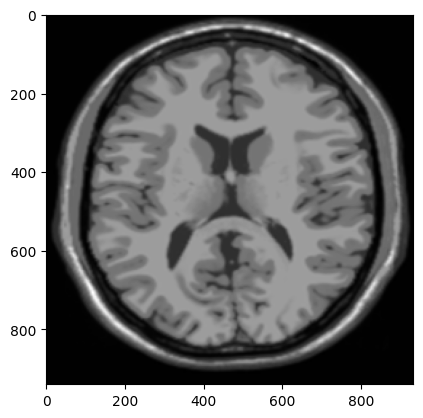

In [13]:
#Bilateral, TV and Wavelet
from skimage.restoration import (denoise_tv_chambolle, denoise_bilateral,
                                 denoise_wavelet, estimate_sigma)
from skimage import img_as_float

noisy_img = img_as_float(io.imread(PATH + "/MRI_noisy.tif"))
sigma_est = estimate_sigma(noisy_img, average_sigmas=True)

denoise_bilateral = denoise_bilateral(noisy_img, sigma_spatial=15)

noise_psnr = peak_signal_noise_ratio(ref_img, noisy_img)
bilateral_cleaned_psnr = peak_signal_noise_ratio(ref_img, denoise_bilateral)
print("PSNR of input noisy image = ", noise_psnr)
print("PSNR of cleaned image = ", bilateral_cleaned_psnr)
plt.imshow(ref_img,cmap='gray')
plt.show()


PSNR of input noisy image =  17.03789982624248
PSNR of cleaned image =  17.19161931394431


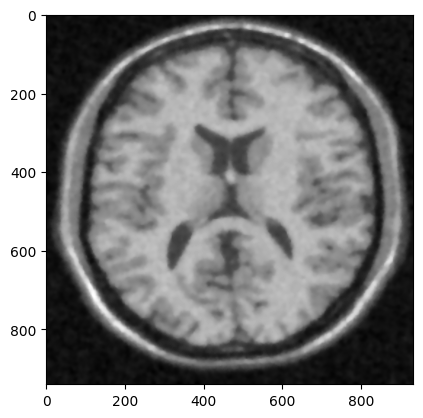

In [16]:
denoise_TV = denoise_tv_chambolle(noisy_img, weight=0.3)
noise_psnr = peak_signal_noise_ratio(ref_img, noisy_img)
TV_cleaned_psnr = peak_signal_noise_ratio(ref_img, denoise_TV)
print("PSNR of input noisy image = ", noise_psnr)
print("PSNR of cleaned image = ", TV_cleaned_psnr)
plt.imshow(denoise_TV,cmap='gray')
plt.show()

PSNR of input noisy image =  17.03789982624248
PSNR of cleaned image =  17.0525032515753


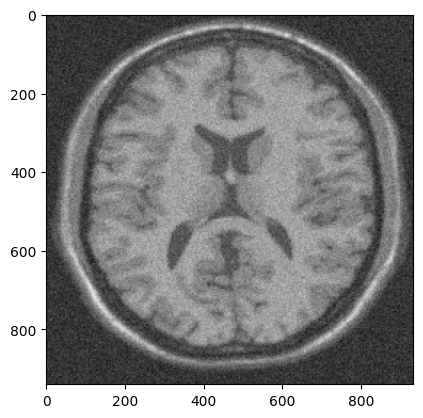

In [18]:
####Wavelet #################
wavelet_smoothed = denoise_wavelet(noisy_img, 
                           method='BayesShrink', mode='soft',
                           rescale_sigma=True)
noise_psnr = peak_signal_noise_ratio(ref_img, noisy_img)
Wavelet_cleaned_psnr = peak_signal_noise_ratio(ref_img, wavelet_smoothed)
print("PSNR of input noisy image = ", noise_psnr)
print("PSNR of cleaned image = ", Wavelet_cleaned_psnr)
plt.imshow(wavelet_smoothed,cmap='gray')
plt.show()

/Users/simoneboesso/Desktop/nuclei-segmentation/nuclei/lib/python3.11/site-packages/skimage/_shared/utils.py:316: UserWarning: The optional dask dependency is not installed. The number of workers is set to 1. To silence this warning, install dask or explicitly set `num_workers=1` when calling the `cycle_spin` function
  return func(*args, **kwargs)


PSNR of input noisy image =  17.03789982624248
PSNR of cleaned image =  17.056279941818776


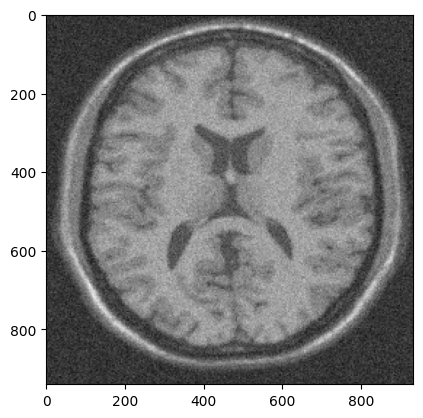

In [23]:
#####################
#Shift invariant wavelet denoising
#https://scikit-image.org/docs/dev/auto_examples/filters/plot_cycle_spinning.html
#Not sure if this is doing anything, check

import matplotlib.pyplot as plt

from skimage.restoration import denoise_wavelet, cycle_spin
from skimage import data, img_as_float
from skimage.util import random_noise
from skimage.metrics import peak_signal_noise_ratio
from skimage import io


noisy_img = img_as_float(io.imread(PATH + "/MRI_noisy.tif"))
ref_img = img_as_float(io.imread(PATH + "/MRI_clean.tif"))


denoise_kwargs = dict( wavelet='db1', method='BayesShrink',
                      rescale_sigma=True)

all_psnr = []
max_shifts = 3     #0, 1, 3, 5

Shft_inv_wavelet = cycle_spin(noisy_img, func=denoise_wavelet, max_shifts = max_shifts,
                            func_kw=denoise_kwargs)

noise_psnr = peak_signal_noise_ratio(ref_img, noisy_img)
shft_cleaned_psnr = peak_signal_noise_ratio(ref_img, Shft_inv_wavelet)
print("PSNR of input noisy image = ", noise_psnr)
print("PSNR of cleaned image = ", shft_cleaned_psnr)
plt.imshow(Shft_inv_wavelet,cmap="gray")
plt.show()

In [28]:
import matplotlib.pyplot as plt
import cv2
from skimage import io
from medpy.filter.smoothing import anisotropic_diffusion
from skimage import img_as_float
from skimage.metrics import peak_signal_noise_ratio


#img = io.imread("MRI_images/MRI_noisy.tif", as_gray=True)
noisy_img = img_as_float(io.imread(PATH + "/MRI_noisy.tif"))
ref_img = img_as_float(io.imread(PATH + "/MRI_clean.tif"))

print(noisy_img.shape)
# niter= number of iterations
#kappa = Conduction coefficient (20 to 100)
#gamma = speed of diffusion (<=0.25)
#Option: Perona Malik equation 1 or 2. A value of 3 is for Turkey's biweight function 
img_aniso_filtered = anisotropic_diffusion(noisy_img, niter=50, kappa=50, gamma=0.2, option=2) 

noise_psnr = peak_signal_noise_ratio(ref_img, noisy_img)
anisotropic_cleaned_psnr = peak_signal_noise_ratio(ref_img, img_aniso_filtered)
print("PSNR of input noisy image = ", noise_psnr)
print("PSNR of cleaned image = ", anisotropic_cleaned_psnr)


plt.imshow(img_aniso_filtered, cmap='gray')

(940, 934)


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [41]:
import matplotlib.pyplot as plt
import cv2
from skimage import io
from medpy.filter.smoothing import anisotropic_diffusion
from skimage import img_as_float
from skimage.metrics import peak_signal_noise_ratio


#img = io.imread("MRI_images/MRI_noisy.tif", as_gray=True)
noisy_img = img_as_float(io.imread(PATH + "/MRI_noisy.tif", as_gray=True))
ref_img = img_as_float(io.imread(PATH+"/MRI_clean.tif"))


# niter= number of iterations
#kappa = Conduction coefficient (20 to 100)
#gamma = speed of diffusion (<=0.25)
#Option: Perona Malik equation 1 or 2. A value of 3 is for Turkey's biweight function 
img_aniso_filtered = anisotropic_diffusion(noisy_img, niter=50, kappa=50, gamma=0.2, option=2) 

noise_psnr = peak_signal_noise_ratio(ref_img, noisy_img)
anisotropic_cleaned_psnr = peak_signal_noise_ratio(ref_img, img_aniso_filtered)
print("PSNR of input noisy image = ", noise_psnr)
print("PSNR of cleaned image = ", anisotropic_cleaned_psnr)


plt.imshow(img_aniso_filtered, cmap='gray')

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

PSNR of input noisy image =  17.03789982624248
PSNR of cleaned image =  17.037900068242585


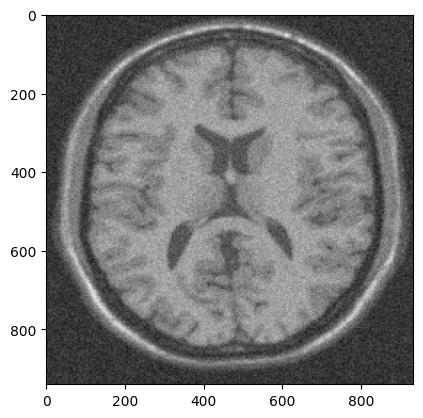

In [34]:
from skimage.restoration import denoise_nl_means, estimate_sigma
from skimage import img_as_ubyte, img_as_float
from matplotlib import pyplot as plt
from skimage import io
import numpy as np
from skimage.metrics import peak_signal_noise_ratio


noisy_img = img_as_float(io.imread(PATH + "/MRI_noisy.tif", as_gray=True))
ref_img = img_as_float(io.imread(PATH +"/MRI_clean.tif"))

sigma_est = np.mean(estimate_sigma(noisy_img))


NLM_skimg_denoise_img = denoise_nl_means(noisy_img, h=1.15 * sigma_est, fast_mode=True,
                               patch_size=9, patch_distance=5)

noise_psnr = peak_signal_noise_ratio(ref_img, noisy_img)
NLM_skimg_cleaned_psnr = peak_signal_noise_ratio(ref_img, NLM_skimg_denoise_img)
print("PSNR of input noisy image = ", noise_psnr)
print("PSNR of cleaned image = ", NLM_skimg_cleaned_psnr)


denoise_img_as_8byte = img_as_ubyte(NLM_skimg_denoise_img)

plt.imshow(NLM_skimg_denoise_img,cmap="gray")
#plt.imshow(denoise_img_as_8byte, cmap=plt.cm.gray, interpolation='nearest')